<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Inspection" data-toc-modified-id="Inspection-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Inspection</a></span></li><li><span><a href="#Test-Functions" data-toc-modified-id="Test-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Test Functions</a></span></li><li><span><a href="#Plotting" data-toc-modified-id="Plotting-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Plotting</a></span><ul class="toc-item"><li><span><a href="#ARIMA" data-toc-modified-id="ARIMA-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ARIMA</a></span></li><li><span><a href="#Pre-Renovation" data-toc-modified-id="Pre-Renovation-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pre Renovation</a></span></li><li><span><a href="#Log-model" data-toc-modified-id="Log-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Log model</a></span></li><li><span><a href="#Sales-Daily-Plotting" data-toc-modified-id="Sales-Daily-Plotting-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Sales Daily Plotting</a></span></li><li><span><a href="#Sales-Monthly-Plotting" data-toc-modified-id="Sales-Monthly-Plotting-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Sales Monthly Plotting</a></span></li></ul></li></ul></div>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
from datetime import datetime
rcParams["figure.figsize"] = 10, 6

# Inspection

In [2]:
store = pd.read_csv("../data/store.csv")


In [3]:
store.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [4]:
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
store["CompetitionOpenSinceYear"].value_counts()

2013.0    83
2012.0    82
2014.0    70
2005.0    62
2010.0    55
2008.0    54
2011.0    54
2009.0    54
2007.0    48
2006.0    47
2015.0    38
2002.0    27
2004.0    22
2003.0    19
2001.0    16
2000.0    10
1999.0     8
1990.0     5
1995.0     2
1994.0     2
1900.0     1
1961.0     1
1998.0     1
Name: CompetitionOpenSinceYear, dtype: int64

In [6]:
train = pd.read_csv("../data/train.csv", low_memory=False)

In [7]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [9]:
train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [10]:
train['Date'].unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [11]:
train['Date'] = pd.to_datetime(train['Date'])
train.set_index('Date', inplace=True)

In [12]:
#creating timeseries of date

sales = train["Sales"].groupby('Date').sum()
sales = sales.to_frame()
sales

,Sales
Date,
2013-01-01,97235
2013-01-02,6949829
2013-01-03,6347820
2013-01-04,6638954
2013-01-05,5951593
...,...
2015-07-27,10707292
2015-07-28,9115073
2015-07-29,8499962


In [13]:
sales_m = sales.reset_index()
sales_m['Date'] = sales_m['Date'].apply(lambda x: x.strftime('%Y-%m'))
sales_m.set_index('Date', inplace=True)
sales_m = sales_m.groupby('Date').sum()

In [14]:
sales_m

,Sales
Date,
2013-01,180132207
2013-02,171534275
2013-03,201180369
2013-04,183431432
2013-05,185411063
2013-06,180702351
2013-07,208843882
2013-08,198042727
2013-09,178053963


<AxesSubplot:xlabel='Date'>

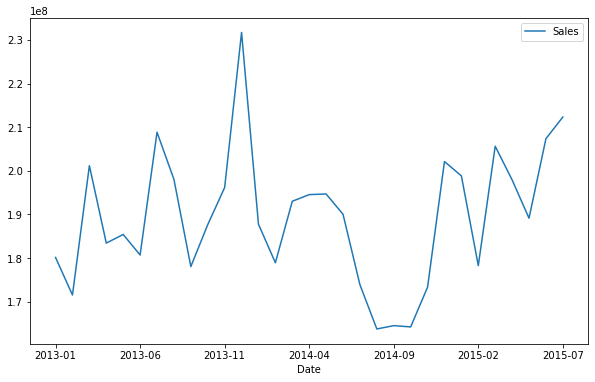

In [15]:
## Monthly
sales_m.plot.line()

<AxesSubplot:xlabel='Date'>

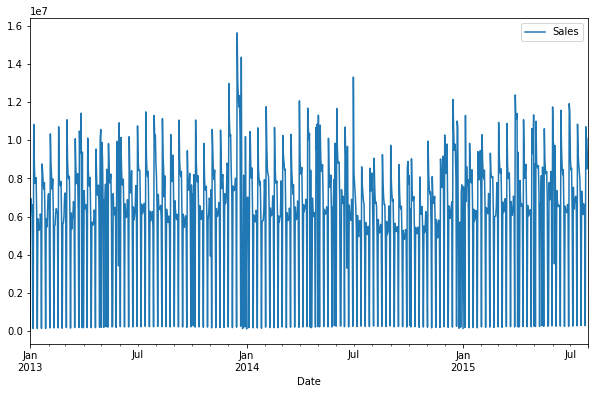

In [16]:
import matplotlib.pyplot as plt
sales.plot.line()

In [17]:
store_ = []
for i in range(1,1116):
    store_.append(train.loc[train['Store'] == i]["Sales"].groupby('Date').sum())
    


<AxesSubplot:xlabel='Date'>

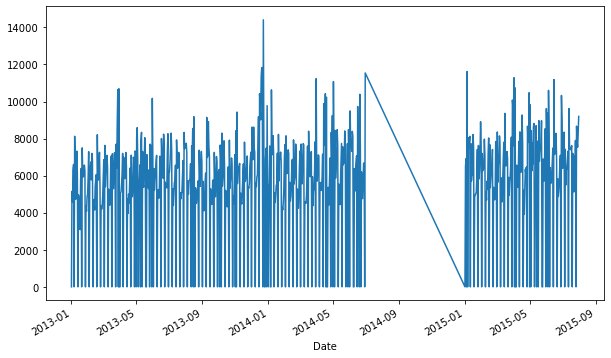

In [18]:
store_[50].plot()

In [19]:
col_name = []
for i in range(1,1116):
    col_name.append("store {0}".format(i))

In [20]:
col_name

['store 1',
 'store 2',
 'store 3',
 'store 4',
 'store 5',
 'store 6',
 'store 7',
 'store 8',
 'store 9',
 'store 10',
 'store 11',
 'store 12',
 'store 13',
 'store 14',
 'store 15',
 'store 16',
 'store 17',
 'store 18',
 'store 19',
 'store 20',
 'store 21',
 'store 22',
 'store 23',
 'store 24',
 'store 25',
 'store 26',
 'store 27',
 'store 28',
 'store 29',
 'store 30',
 'store 31',
 'store 32',
 'store 33',
 'store 34',
 'store 35',
 'store 36',
 'store 37',
 'store 38',
 'store 39',
 'store 40',
 'store 41',
 'store 42',
 'store 43',
 'store 44',
 'store 45',
 'store 46',
 'store 47',
 'store 48',
 'store 49',
 'store 50',
 'store 51',
 'store 52',
 'store 53',
 'store 54',
 'store 55',
 'store 56',
 'store 57',
 'store 58',
 'store 59',
 'store 60',
 'store 61',
 'store 62',
 'store 63',
 'store 64',
 'store 65',
 'store 66',
 'store 67',
 'store 68',
 'store 69',
 'store 70',
 'store 71',
 'store 72',
 'store 73',
 'store 74',
 'store 75',
 'store 76',
 'store 77',
 'store 

In [21]:
df_stores = pd.concat(store_, axis=1)
df_stores.head()
df_stores.columns= col_name

In [22]:
df_stores.head()

,store 1,store 2,store 3,store 4,store 5,store 6,store 7,store 8,store 9,store 10,...,store 1106,store 1107,store 1108,store 1109,store 1110,store 1111,store 1112,store 1113,store 1114,store 1115
Date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,0,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,0,0,0,0
2013-01-02,5530,4422,6823,9941,4253,6089,8244,5419,4903,4812,...,5099,3955.0,6220,4576.0,4126,5097,10797,6218,20642,3697
2013-01-03,4327,4159,5902,8247,3465,5398,7231,4842,4602,4675,...,4330,3151.0,4779,3654.0,3508,4579,8716,5563,18463,4297
2013-01-04,4486,4484,6069,8290,4456,6092,7758,4059,4798,5114,...,3956,3990.0,5491,3596.0,3933,4640,9788,5524,18371,4540
2013-01-05,4997,2342,4523,10338,1590,3872,5218,2337,4254,4256,...,2624,5128.0,2113,2897.0,3156,3325,9513,5194,18856,4771


In [23]:
# df_stores.plot(subplots=True, layout=(223,5))

count=1
for i in df.columns:
    plt.subplot(n,1,count)
    sns.lineplot(df_stores[i])
    count+=1

# Test Functions

In [51]:
from statsmodels.tsa.stattools import adfuller
def test(timeseries):
    rollmean = timeseries.rolling(window=30).mean()
    rollstd = timeseries.rolling(window=30).std()
    
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(rollmean, color='red', label='rolling mean')
    std = plt.plot(rollstd, color='black', label='rolling std')
    plt.legend(loc="best")
    plt.show(block = False)
    
    dftest = adfuller(timeseries["Sales"], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#lags used','#observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
def test_m(timeseries):
    rollmean = timeseries.rolling(window=6).mean()
    rollstd = timeseries.rolling(window=6).std()
    
    orig = plt.plot(timeseries, color='blue', label='original')
    mean = plt.plot(rollmean, color='red', label='rolling mean')
    std = plt.plot(rollstd, color='black', label='rolling std')
    plt.legend(loc="best")
    plt.show(block = False)
    
    dftest = adfuller(timeseries["Sales"], autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#lags used','#observations used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

# Plotting

## ARIMA

In [115]:
from pmdarima import auto_arima

ModuleNotFoundError: No module named 'pmdarima'

In [117]:
!pip install pmdarima

zsh:1: command not found: pip


## Pre Renovation

In [36]:
Pre_R = sales.loc['2013-01-01':'2014-06-30']

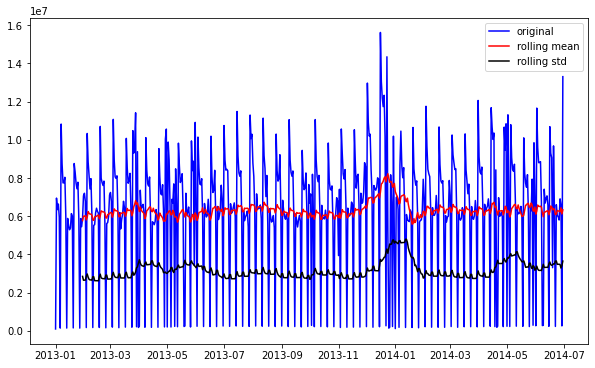

Test Statistic           -5.618903
p-value                   0.000001
#lags used               16.000000
#observations used      529.000000
Critical Value (1%)      -3.442772
Critical Value (5%)      -2.867019
Critical Value (10%)     -2.569688
dtype: float64


In [46]:
test(Pre_R)

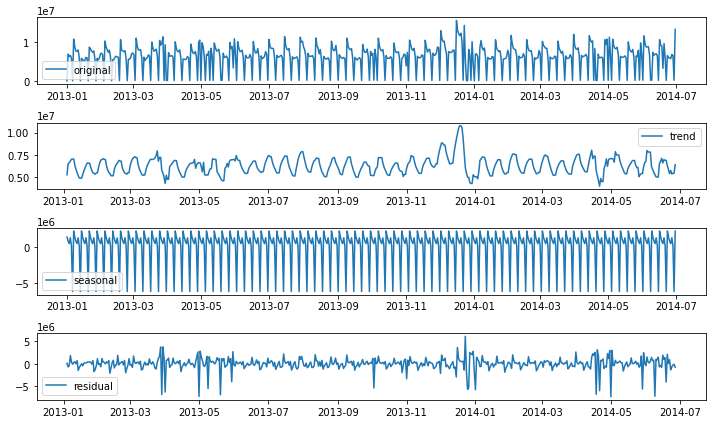

In [60]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(Pre_R)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(Pre_R, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout() 

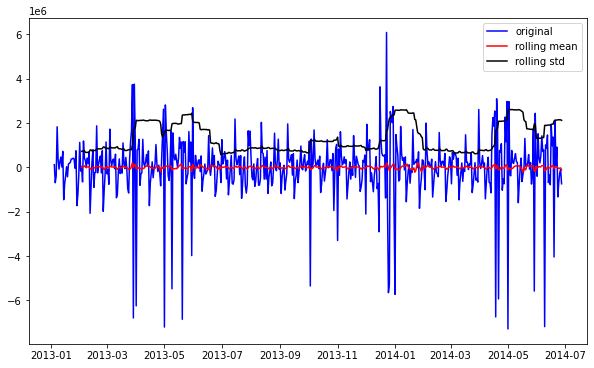

Test Statistic         -1.285479e+01
p-value                 5.259938e-24
#lags used              1.700000e+01
#observations used      5.220000e+02
Critical Value (1%)    -3.442940e+00
Critical Value (5%)    -2.867093e+00
Critical Value (10%)   -2.569727e+00
dtype: float64


In [76]:
decomposed_data = residual
residual.dropna(inplace=True)

rollmean = residual.rolling(window=30).mean()
rollstd = residual.rolling(window=30).std()
    
orig = plt.plot(residual, color='blue', label='original')
mean = plt.plot(rollmean, color='red', label='rolling mean')
std = plt.plot(rollstd, color='black', label='rolling std')
plt.legend(loc="best")
plt.show(block = False)
    
dftest = adfuller(residual, autolag = 'AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value', '#lags used','#observations used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

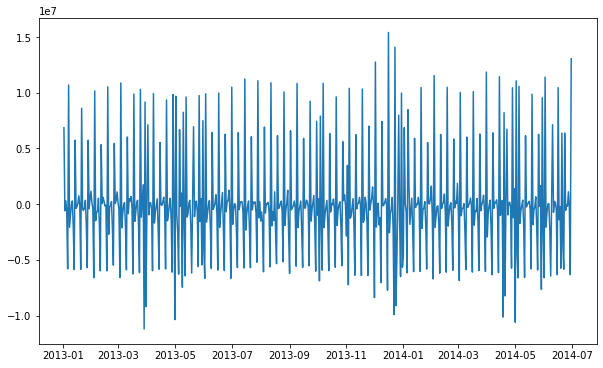

In [111]:
#Shifting values
Pre_R_shift = Pre_R - Pre_R.shift()
plt.plot(Pre_R_shift)

/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


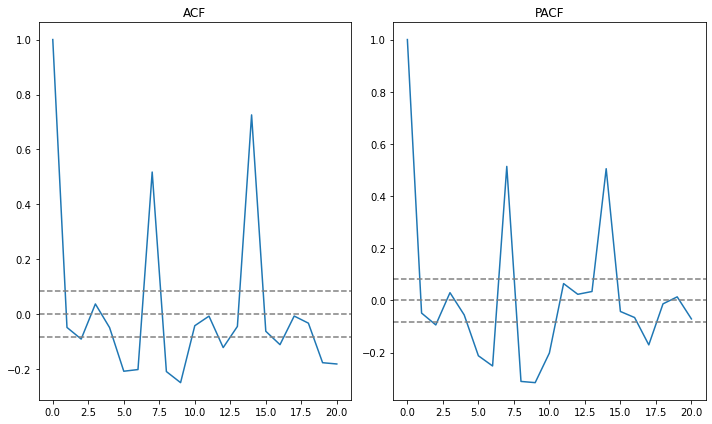

In [114]:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(Pre_R, nlags=20)
lag_pacf = pacf(Pre_R, nlags=20, method='ols')

#plotting
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("ACF")


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("PACF")
plt.tight_layout() 

In [95]:
Removed_seasonal = Pre_R['Sales'] - seasonal

/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

plotting AR Model


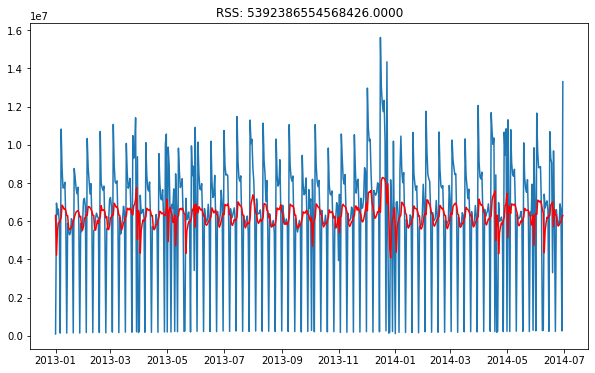

In [98]:
from statsmodels.tsa.arima_model import ARIMA

#AR Model
model = ARIMA(Pre_R_shift, order=(1,0,1))
results_AR = model.fit(disp=-1)
plt.plot(Pre_R)
plt.plot(results_AR.fittedvalues, color="red")
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - Pre_R['Sales'])**2))
print('plotting AR Model')

In [ ]:
#AR Model
model = ARIMA(Removed_seasonal, order=(1,0,1))
results_AR = model.fit(disp=-1)
plt.plot(Removed_seasonal)
plt.plot(results_AR.fittedvalues, color="red")
plt.title('RMSE: %.4f'% np.sqrt(np.mean((results_AR.fittedvalues - Removed_seasonal)**2)))
print('plotting AR Model')
# results_AR.fittedvalues + seasonal

## Log model

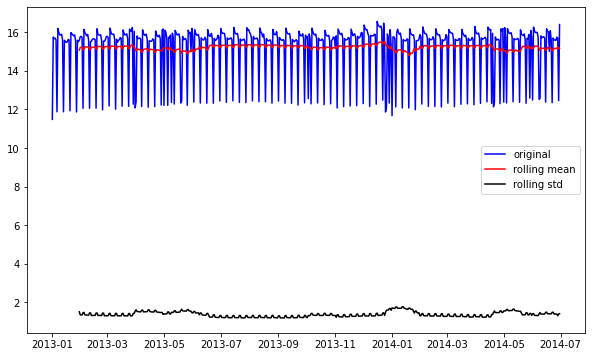

Test Statistic         -5.975721e+00
p-value                 1.889640e-07
#lags used              1.900000e+01
#observations used      5.260000e+02
Critical Value (1%)    -3.442843e+00
Critical Value (5%)    -2.867050e+00
Critical Value (10%)   -2.569705e+00
dtype: float64


In [47]:
#trend estimation
Pre_R_log = np.log(Pre_R)
test(Pre_R_log)

In [54]:
log_minus_mean = Pre_R_log - Pre_R_log.rolling(window=30).mean()
log_minus_mean.dropna(inplace=True)

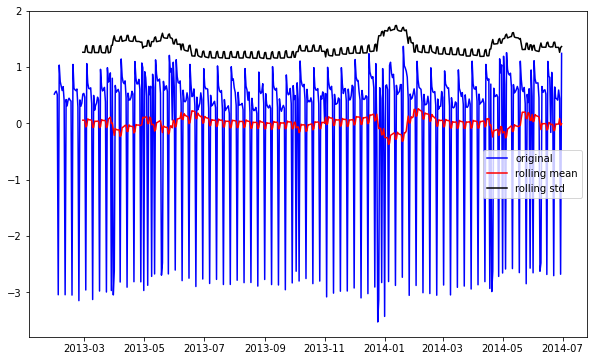

Test Statistic         -6.580468e+00
p-value                 7.536739e-09
#lags used              1.900000e+01
#observations used      4.970000e+02
Critical Value (1%)    -3.443576e+00
Critical Value (5%)    -2.867373e+00
Critical Value (10%)   -2.569877e+00
dtype: float64


In [55]:
test(log_minus_mean)

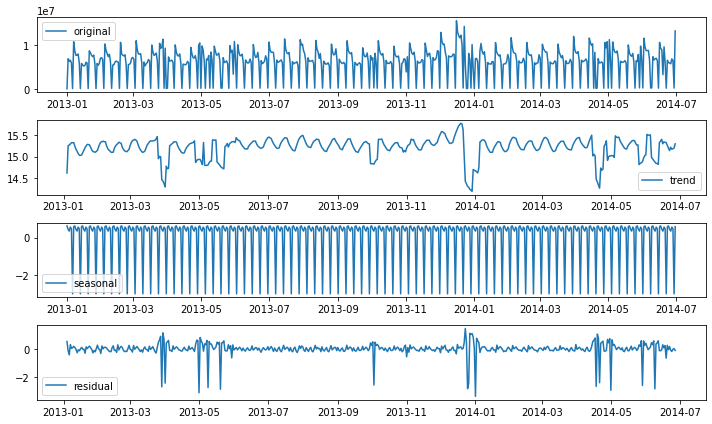

In [99]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp = seasonal_decompose(Pre_R_log)

trend = decomp.trend
seasonal = decomp.seasonal
residual = decomp.resid

plt.subplot(411)
plt.plot(Pre_R, label='original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout() 

/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


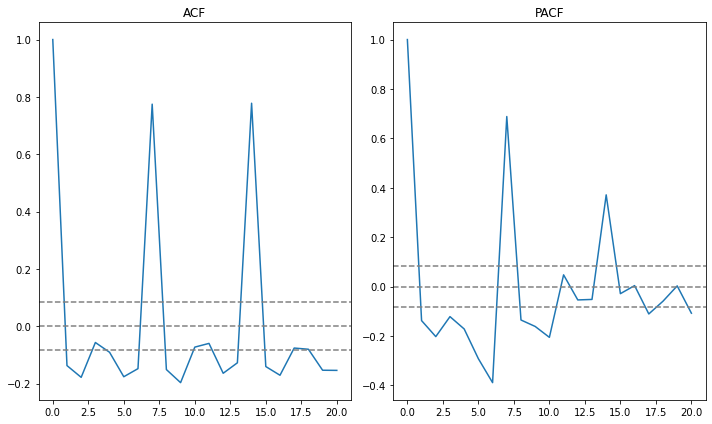

In [100]:
lag_acf_log = acf(Pre_R_log, nlags=20)
lag_pacf_log = pacf(Pre_R_log, nlags=20, method='ols')

#plotting
plt.subplot(121)
plt.plot(lag_acf_log)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("ACF")


plt.subplot(122)
plt.plot(lag_pacf_log)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Pre_R)), linestyle='--', color='gray')
plt.title("PACF")
plt.tight_layout() 

/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/FH/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferr

plotting AR Model


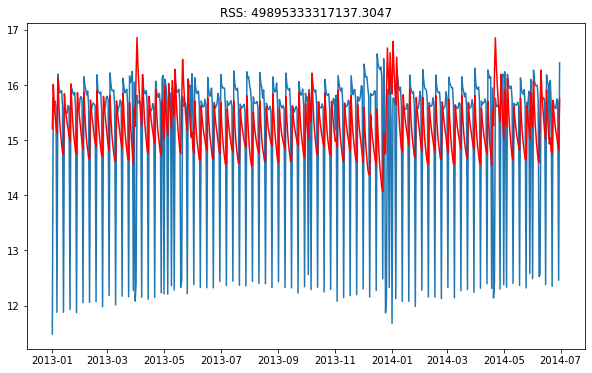

In [110]:
#AR Model
model = ARIMA(Pre_R_log, order=(1,0,1))
results_AR = model.fit(disp=-1)
plt.plot(Pre_R_log)
plt.plot(results_AR.fittedvalues, color="red")
plt.title('RSS: %.4f'% np.mean((results_AR.fittedvalues - Pre_R['Sales'])**2))
print('plotting AR Model')

## Sales Daily Plotting

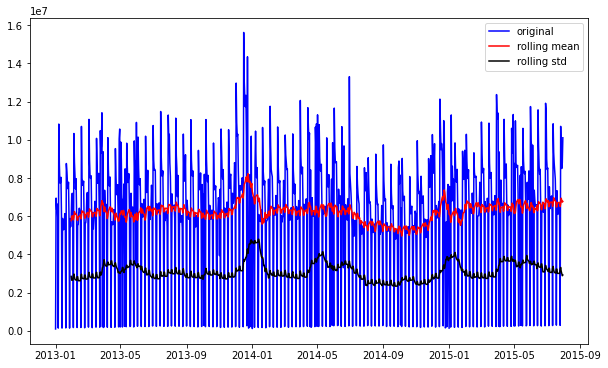

Test Statistic           -4.761615
p-value                   0.000064
#lags used               20.000000
#observations used      921.000000
Critical Value (1%)      -3.437470
Critical Value (5%)      -2.864683
Critical Value (10%)     -2.568444
dtype: float64


In [48]:
test(sales)

## Sales Monthly Plotting

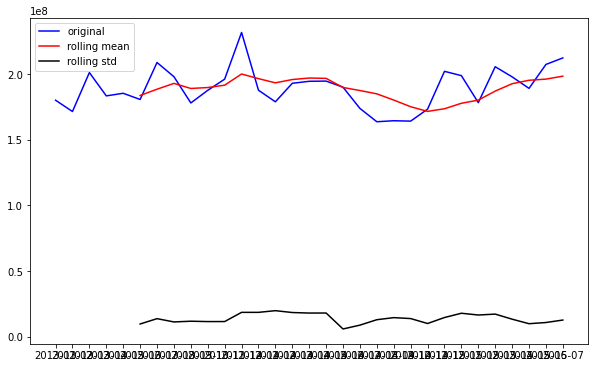

Test Statistic          -3.544365
p-value                  0.006918
#lags used               0.000000
#observations used      30.000000
Critical Value (1%)     -3.669920
Critical Value (5%)     -2.964071
Critical Value (10%)    -2.621171
dtype: float64


In [56]:
test_m(sales_m)